# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)
# a = np.zeros((m,n))
# np.fill_diagonal(a,s)
# u*a*vh
A

array([[0.1, 0.5],
       [0.4, 0.8]])

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    u, s, vh = svd(A)
    salida = np.matrix(u[:, :min(A.shape)])*np.diag(s[:min(A.shape)])*np.matrix(vh[:min(A.shape) , :])
    return np.allclose(A, salida)

In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

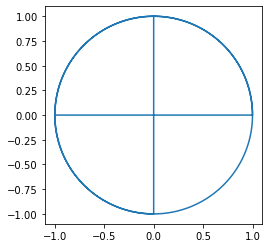

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


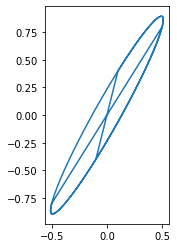

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
u, s, vh = svd(A)
m, n = A.shape
a = np.zeros((m,n))
np.fill_diagonal(a,s)

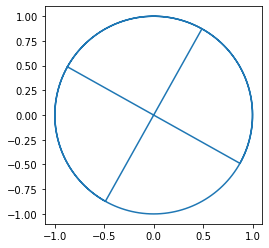

In [11]:
show_circle(u @ circle)

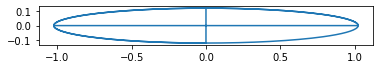

In [12]:
show_circle(a @ circle)

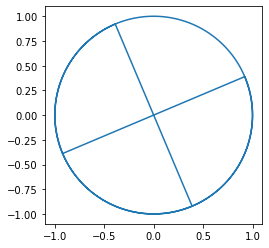

In [13]:
show_circle(vh @ circle)

__Respuesta:__ Se observa que para el operador $U$ la circunferencia se mantiene unitaria, pero se ve rotada respecto a su forma original, la misma respuesta se obtiene al aplicar el operador $V^H$, pero con un diferente ángulo de rotación. Además, se observa para el operador $\Sigma$ que la circunferencia se deforma, tomando una forma achatada, pero no rotada como con $U$ y $V^H$.
Dado que $U$ y $V^H$ son unitarias se mantienen las dimensiones originales del círculo y no cambia su forma, a diferencia de cuando se le aplica el operador A o $\Sigma$.

__Respuesta:__ Se puede observar que, dado que los operadores son una descomposición de la matriz A, estos representan las transformaciones que tiene A. El $U$ y el $V^H$ representan la rotación de A y $\Sigma$ representa la deformación. Se puede concluir que los valores fuera de la diagonal son la rotación del cículo y la norma es la deformación.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [14]:
from pathlib import Path
from PIL import Image

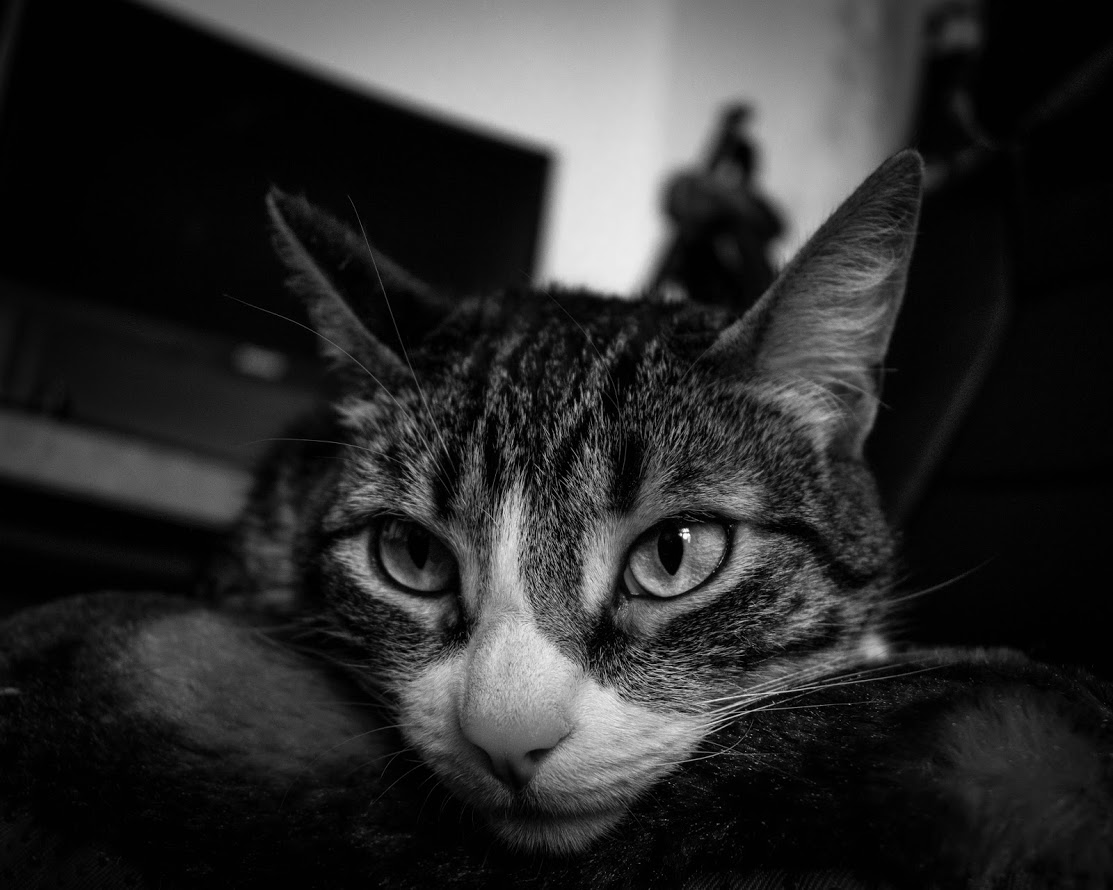

In [15]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [16]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [17]:
def low_rank_svd_approximation(A, l):
    u, s, vh = svd(A)
    salida = np.matrix(u[:, :l])*np.diag(s[:l])*np.matrix(vh[:l , :])
    resta = A - salida
    n, m = A.shape
    frob = 0
    for j in range(n):
        for k in range(m):
            frob += (resta[j,k])**2   
    frob = frob**(1/2)
    suma = 0
    for i in range(l+1,min(A.shape)):
        suma += s[i]**2
    suma = suma**(1/2)
    print((frob-suma)/frob)
    return salida

0.044210433068013755


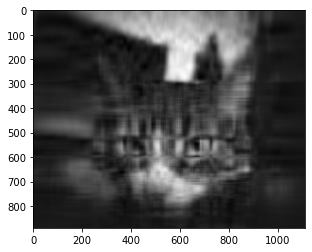

In [18]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

0.009106110876459673


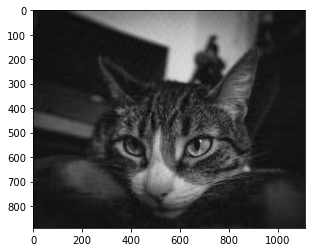

In [19]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

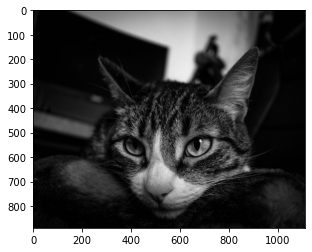

In [20]:
plt.imshow(cat_np, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [21]:
def low_rank_svd_tol_approximation(A, tol):
    u, s, vh = svd(A)
    n, m = A.shape
    denom = 0
    for i in range(len(s)):
        denom += s[i]**2
    desi = (tol**2)*denom
    num = 0
    for j in reversed(range(len(s))):
        num += s[j]
        if desi <= num**2:
            l = j
            break
    salida = np.matrix(u[:, :l])*np.diag(s[:l])*np.matrix(vh[:l , :])
    print(l)
    return salida
    

152


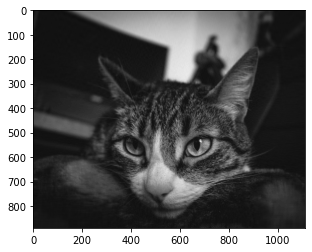

In [22]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1)
plt.imshow(cat_e1, cmap='gray');

776


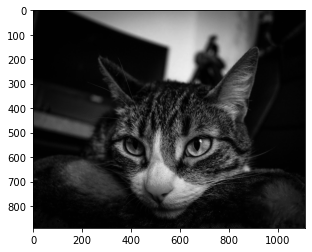

In [23]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

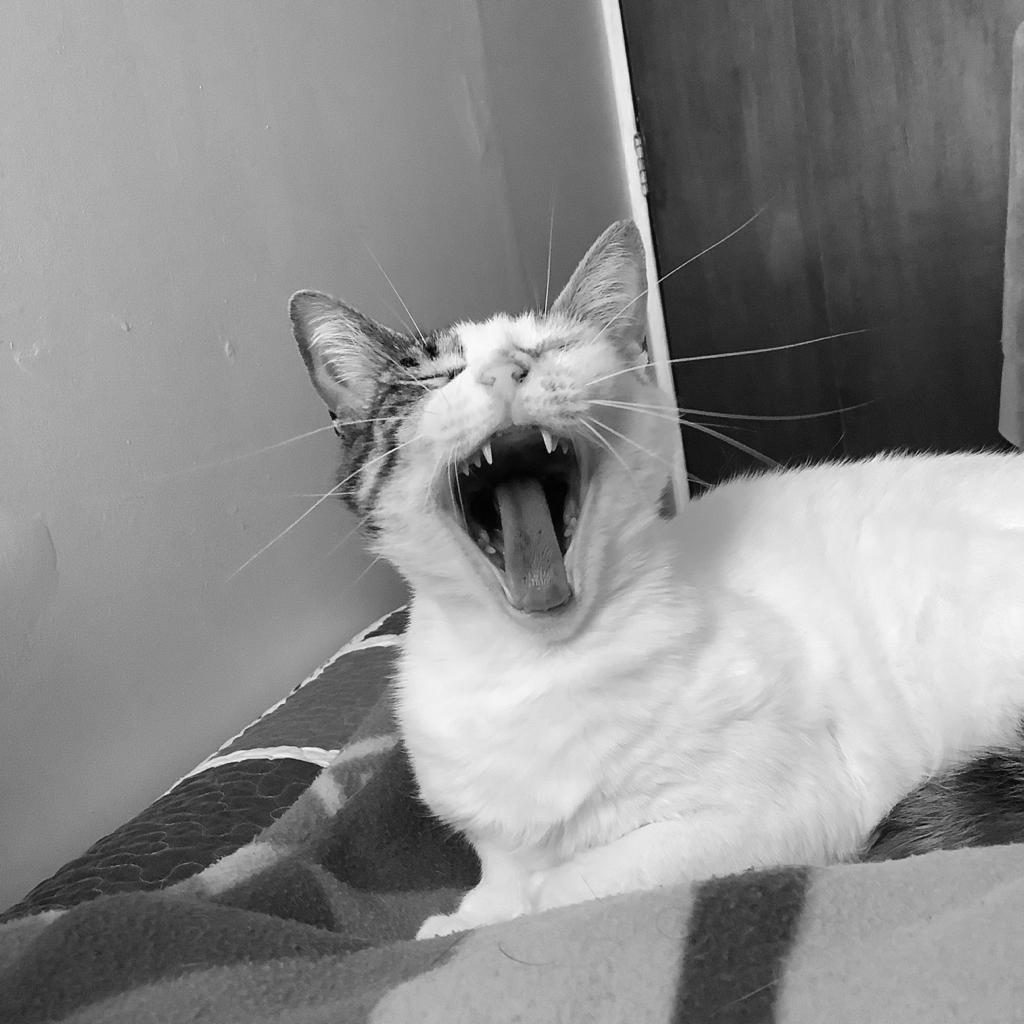

In [24]:
your_img_name = "sansa.jpeg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [25]:
your_img_np = np.array(your_img)
print(your_img_np.shape)

(1024, 1024)


0.0473934102953035


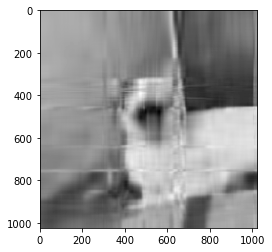

In [26]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

0.024378517724105576


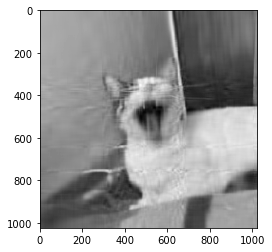

In [27]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

411


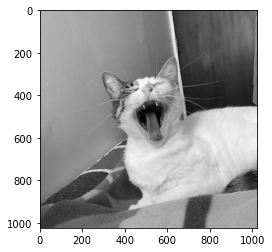

In [28]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

707


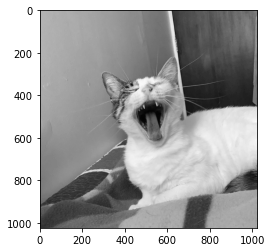

In [29]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Me parece una forma útil, pero para los casos en que el l es muy bajo la imagen no se ve muy bien entonces puede que no sea adecuado para esos casos.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [30]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [31]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [32]:
start_date = pd.to_datetime(date(2020,10,1))
end_date = pd.to_datetime(date(2020,10,11))
dates = pd.date_range(start_date, end_date, periods=None, freq='D').strftime('%Y-%m-%d')

In [33]:
covid_comunas_nuevos = covid_comunas.loc[lambda x: x['poblacion'].notnull()].fillna(0).drop(columns="codigo_region").drop(columns="codigo_comuna")
covid_comunas_nuevos = pd.melt(covid_comunas_nuevos, id_vars=['region', 'comuna', 'poblacion', 'tasa'], var_name='fecha', value_name='casos_totales')

covid_comunas_nuevos['fecha'] = pd.to_datetime(covid_comunas_nuevos['fecha'].values)


In [34]:
covid2 = covid_comunas_nuevos.assign(casos_nuevos=lambda df: df.groupby("comuna")["casos_totales"].diff())
# Fechas ordenadas por defecto

In [35]:
covid2 = covid2.loc[lambda x: x['fecha'] > start_date]
covid2 = covid2.loc[lambda x: x['fecha'] < end_date]
promedio = covid2.assign(promedio_casos_nuevos=lambda df: df.groupby(["region", "comuna"])["casos_nuevos"].transform(lambda s: s.mean())
)



In [36]:
def tasa(df):
    return df['promedio_casos_nuevos']*100000/df['poblacion']

In [37]:
covid_tasa_promedio_nuevos = promedio.groupby(["region", "comuna"]).apply(tasa).to_frame().sort_values(0)
covid_tasa_promedio_nuevos.tail(50)

0
region     comuna                                 
Los Lagos  Los Muermos          19338   129.090195
                                19684   129.090195
           Puyehue              19693   130.086819
                                19347   130.086819
                                20039   130.086819
           Fresia               20025   139.591235
                                19679   139.591235
                                19333   139.591235
Atacama    Freirina             19747   143.210519
                                19401   143.210519
                                19055   143.210519
Araucanía  Saavedra             19997   151.124313
                                19651   151.124313
                                19305   151.124313
Magallanes Rio Verde            19372   157.977883
                                19718   157.977883
                                20064   157.977883
Aysén      Coyhaique            20051   158.470838
                                19359   158.470838
                                19705   158.470838
Araucanía  Ercilla              19980   181.287933
                                19288   181.287933
                                19634   181.287933
           Carahue              19628   183.107065
                                19974   183.107065
                                19282   183.107065
Los Lagos  Rio Negro            20044   226.503211
                                19352   226.503211
                                19698   226.503211
           San Juan de la Costa 19699   266.177947
                                20045   266.177947
                                19353   266.177947
Magallanes Natales              20060   406.469879
                                19368   406.469879
                                19714   406.469879
           Punta Arenas         20063   444.651040
                                19371   444.651040
                                19717   444.651040
           Porvenir             20061   468.842460
                                19715   468.842460
                                19369   468.842460
           Laguna Blanca        20059   505.050505
                                19367   505.050505
                                19713   505.050505
           San Gregorio         20065   587.371512
                                19719   587.371512
                                19373   587.371512
           Timaukel             20066  1182.033097
                                19720  1182.033097
                                19374  1182.033097

__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Entre ellas se destacan las del sur de Chile en la región de Magallanes. De las ciudades principales se encuentran Punta Arenas y Coyhaique

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [38]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,794,738,737,832,542,343,706,777,1058,1025
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,972,932,1046,1044,796,714,694,946,1752,906
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1571,1890,2239,3825,1749,1354,1858,1238,1906,2549
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,792,838,1020,939,563,340,237,838,863,781
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1008,1128,1057,1026,473,1503,1050,1125,1351,1245


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [39]:
covid_pcr2 = covid_pcr.fillna(0).drop(columns="codigo_region").drop(columns="poblacion")
covid_pcr_melt = pd.melt(covid_pcr2, id_vars=['region'], var_name='fecha', value_name='nm_pcr')
covid_pcr_melt['fecha'] = pd.to_datetime(covid_pcr_melt['fecha'].values)

covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3307,Araucanía,2020-11-01,1878.0
3308,Los Ríos,2020-11-01,836.0
3309,Los Lagos,2020-11-01,5232.0
3310,Aysén,2020-11-01,333.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [40]:
covid_comunas3 = covid_comunas.fillna(0).drop(columns="codigo_region").drop(columns="comuna").drop(columns="codigo_comuna").drop(columns="poblacion").drop(columns="tasa")
covid_casos_melt = pd.melt(covid_comunas3, id_vars=['region'], var_name='fecha', value_name='casos_totales')
covid_casos_melt['fecha'] = pd.to_datetime(covid_casos_melt['fecha'].values)

covid_casos_melt

,region,fecha,casos_totales
0,Arica y Parinacota,2020-03-30,6.0
1,Arica y Parinacota,2020-03-30,0.0
2,Arica y Parinacota,2020-03-30,0.0
3,Arica y Parinacota,2020-03-30,0.0
4,Arica y Parinacota,2020-03-30,0.0
...,...,...,...
23163,Magallanes,2020-10-30,2.0
23164,Magallanes,2020-10-30,20.0
23165,Magallanes,2020-10-30,21.0
23166,Magallanes,2020-10-30,2.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [53]:
covid_corr_casos_pcr = (
    covid_pcr_melt.merge(covid_casos_melt, how='outer', on=['region', 'fecha'] )
)
covid_corr_casos_pcr['nm_pcr'] = covid_corr_casos_pcr['nm_pcr'].fillna(0)
covid_corr_casos_pcr['casos_totales'] = covid_corr_casos_pcr['casos_totales'].ffill(axis = 0)
covid_corr_casos_pcr.groupby('region').corr().sort_values('nm_pcr')

,,nm_pcr,casos_totales
region,,,
Magallanes,casos_totales,0.185950,1.000000
Antofagasta,casos_totales,0.230457,1.000000
Los Lagos,casos_totales,0.230617,1.000000
Aysén,casos_totales,0.239938,1.000000
Ñuble,casos_totales,0.254526,1.000000
O’Higgins,casos_totales,0.254531,1.000000
Arica y Parinacota,casos_totales,0.260784,1.000000
Atacama,casos_totales,0.282756,1.000000
Araucanía,casos_totales,0.301838,1.000000


__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ Se observa que la correlación es menor para magallanes, los lagos y antofagasta y es mayor para biobio, maule y RM, lo cual tiene sentido ya que en las últimas regiones mencionadas hay más población que en las primeras, donde debido a que hay mucha población, no se hacen tantos test PCR como en las regiones con menos población.
Se puede observar que para las regiones de menos población se hacen muchos exámenes PCR para encontrar contagiados en esas regiones, bajando la correlación entre casos totales y contagiados.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ ¿Qué relación exite entre el rango etario y el número de pacientes UCI y fallecidos?

In [42]:
covid_uci = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto9/HospitalizadosUCIEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_uci.head()

,grupo_de_edad,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,...,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01
0,<=39,23,23,26,40,40,38,39,42,46,...,48,49,44,46,48,49,50,47,42,41
1,40-49,23,27,34,36,40,40,38,39,48,...,52,46,49,51,54,57,63,66,65,66
2,50-59,53,67,74,84,89,95,101,109,102,...,160,154,153,155,151,155,154,160,163,157
3,60-69,39,46,56,68,75,78,82,93,89,...,242,233,234,237,242,241,240,249,242,242
4,>=70,35,37,47,52,63,76,77,79,75,...,257,247,243,241,245,243,241,242,244,237


In [43]:
uci = pd.melt(covid_uci, id_vars=['grupo_de_edad'], var_name='fecha', value_name='casos_totales')
uci.groupby("grupo_de_edad").agg(suma=("casos_totales", "sum"))

,suma
grupo_de_edad,
40-49,23338
50-59,57596
60-69,78130
<=39,18646
>=70,57680


In [44]:
uci.groupby("grupo_de_edad").agg(suma=("casos_totales", "sum")).idxmax()

suma    60-69
dtype: object

In [45]:
covid_fall = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_fall.head()

,grupo_de_edad,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,...,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01
0,<=39,2,2,3,3,3,3,3,3,4,...,310,310,311,311,313,313,314,315,317,317
1,40-49,1,2,2,2,2,2,2,2,2,...,467,469,469,472,473,473,477,480,483,484
2,50-59,1,2,2,3,3,5,5,6,8,...,1398,1404,1409,1414,1415,1415,1423,1425,1431,1436
3,60-69,9,10,12,12,12,12,12,14,16,...,2925,2943,2957,2966,2971,2973,2994,3005,3013,3023
4,70-79,21,22,24,28,29,30,31,32,36,...,3898,3906,3915,3934,3942,3943,3973,3981,3996,4010


In [46]:
muertes = pd.melt(covid_fall, id_vars=['grupo_de_edad'], var_name='fecha', value_name='fallecidos')
muertes.groupby("grupo_de_edad").agg(suma=("fallecidos", "sum"))

,suma
grupo_de_edad,
40-49,50435
50-59,150295
60-69,312960
70-79,419927
80-89,377336
<=39,33043
>=90,134960


In [47]:
muertes.groupby("grupo_de_edad").agg(suma=("fallecidos", "sum")).idxmax()

suma    70-79
dtype: object

__Respuesta:__ En base a los datos se puede observar que a medida que aumenta el rango etario, aumentan los hospitalizados UCI y los fallecidos, lo que genera una relación directa entre la edad del individuo y la gravedad del COVID.19 en su organismo.
Por otro lado, es interesante destacar que la cifra de fallecidos es mucho mayor a la cifra de hospitalizados UCI, lo que indica que a pesar de la gravedad de la enfermedad las personas no son internadas y quizás en algunos casos fallezcan antes de recibir atención médica.

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ ¿Existe correlación entre los pacientes con ventilación mecánica por covid y la cantidad de ciudades que entran en cuaretena?

In [48]:
covid_VMI = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto30/PacientesVMI.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_VMI.head()

,casos,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,...,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01
0,Pacientes VMI,322.0,328.0,330.0,315.0,315.0,313.0,316.0,296.0,312.0,...,610,591,593,610,619,612,611,617,613,606
1,Pacientes no VM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118,109,98,91,93,108,112,120,115,108
2,Pacientes VM no invasiva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31,29,32,29,28,25,25,27,28,29


In [49]:

covid_VMI2 = covid_VMI.drop(index = 1)
covid_VMI2 = pd.melt(covid_VMI2, id_vars=['casos'], var_name='fecha', value_name='pacientes').fillna(0)
covid_VMI2.groupby("fecha").agg(suma=("pacientes", "sum")).idxmax()

suma    2020-06-28
dtype: object

In [50]:
covid_cua = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Activas.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_cua.head()

,id,nombre,estado,alcance,fecha_de_inicio,fecha_de_término,código_cut_comuna,detalle,superficie_en_m2,perímetro_en_m
0,4,El Bosque,Activa,Comuna completa,2020-04-16 22:00:00,NaN,13105,Aplicada a la totalidad de la comuna. Se incor...,2.062271e+07,18788.870751
1,26,Quinta Normal,Activa,Comuna completa,2020-04-23 22:00:00,NaN,13126,Aplicada a la totalidad de la comuna. Se incor...,1.701414e+07,21243.797017
2,27,Pedro Aguirre Cerda,Activa,Comuna completa,2020-04-23 22:00:00,NaN,13121,Aplicada a la totalidad de la comuna. Se incor...,1.262515e+07,15651.718963
3,32,Estación Central,Activa,Comuna completa,2020-04-30 22:00:00,NaN,13106,Aplicada a la totalidad de la comuna. Se incor...,2.068257e+07,22689.227465
4,33,Independencia Extensión a Total,Activa,Comuna completa,2020-04-30 22:00:00,NaN,13108,Aplicada a la totalidad de la comuna. Extendid...,1.058291e+07,13699.912845


In [51]:
covid_cua['fecha_de_inicio'] = pd.to_datetime(covid_cua['fecha_de_inicio'].values)
covid_cua2 = covid_cua.drop(columns="id").drop(columns="alcance").drop(columns="código_cut_comuna").drop(columns="detalle").drop(columns="superficie_en_m2").drop(columns="perímetro_en_m")
# covid_cua2.groupby(['nombre', 'estado', 'fecha_de_inicio']).agg()
x = covid_cua['fecha_de_inicio'].value_counts()
x

2020-05-08 22:00:00    14
2020-05-15 22:00:00    12
2020-06-12 22:00:00     8
2020-07-27 22:00:00     7
2020-06-26 22:00:00     5
2020-06-19 22:00:00     4
2020-05-05 22:00:00     3
2020-06-23 22:00:00     3
2020-07-14 22:00:00     2
2020-04-30 22:00:00     2
2020-04-23 22:00:00     2
2020-04-16 22:00:00     1
Name: fecha_de_inicio, dtype: int64

__Respuesta:__ La fecha en que hubo más pacientes conectados a ventilación mecánica fue el 2020-06-28. Si se observan las fechas en que entraron más ciudades en cuarentena se puede ver que estas son cercanas a la fecha con mayor cantidad de pacientes conectados, por lo que existe correlación entre el número de pacientes y las ciudades que entraron a cuarentena.